In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [4, 3]

1) Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2) Какой клиент совершил больше всего успешных операций? (success == True)
3) С какой платформы осуществляется наибольшее количество успешных операций?
4) Какую платформу предпочитают премиумные клиенты?
5) Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6) Постройте график распределения числа успешных операций
7) Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

Описание данных

user_data:

    client – идентификатор пользователя
    premium – является ли клиент премиум
    age – возраст

logs:

    client – идентификатор пользователя
    success – результат (успех - 1, нет - 0)
    platform – платформа
    time – время в формате Unix

In [21]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv', parse_dates=['time'])

# Задание 1. Проверяем данные

In [26]:
user_data.head(3)

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64


In [11]:
user_data.shape

(2954, 3)

In [12]:
logs.shape

(4500, 4)

In [22]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [23]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [32]:
user_data.nunique()

client     2954
premium       2
age          50
dtype: int64

In [27]:
logs.head(3)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894


In [24]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   object
dtypes: bool(1), int64(1), object(2)
memory usage: 110.0+ KB


In [25]:
logs.describe()

,client
count,4500.000000
mean,50998.758000
std,28374.472495
min,40.000000
25%,27056.500000
50%,52659.000000
75%,76001.250000
max,99993.000000


In [33]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

С данными вроде бы все в порядке, пропущенных значений нет, типы подходят, правда пришлось время перевести из инта в object.

# Задание 2. Какой клиент совершил больше всего успешных операций?

In [28]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [29]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [39]:
user_log = logs.merge(user_data, how='left')

In [66]:
success_log_count = user_log \
    .query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'count'}) \
    .rename(columns={'success': 'success_log_count'}) \
    .sort_values('success_log_count', ascending=False)

In [70]:
max_clients = success_log_count \
    .query('success_log_count == 41')

In [74]:
# to_list() - метод для преобразования колонки датафрейма в список
# еще можно сделать так: list(df['column'])

most_success_log_clients = max_clients.client.to_list()

In [225]:
# получили список клиентов с наибольшим количеством успешных операция (41 операция)

sorted(most_success_log_clients)

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

# Задание 3. С какой платформы осуществляется наибольшее количество успешных операций?

In [76]:
user_log.head()

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,35604,False,phone,1585459894,True,65.0
3,9961,True,phone,1585400189,NaN,NaN
4,10931,True,computer,1585468629,False,28.0


In [80]:
user_log \
    .query('success == True') \
    .groupby('platform', as_index=False) \
    .agg({'client': 'count'}) \
    .rename(columns={'client': 'client_count'})

,platform,client_count
0,computer,1090
1,phone,2019
2,tablet,180


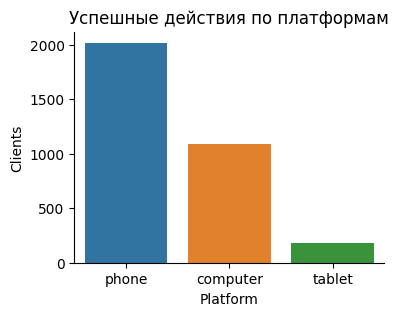

In [91]:
platforms_chart = sns.countplot(x='platform', data=user_log.query('success == True'))
sns.despine()
platforms_chart.set(xlabel='Platform', ylabel='Clients')
plt.title('Успешные действия по платформам')
plt.show()

Больше всего успешных действий было проведено с мобильных телефонов.

# Задание 4. Какую платформу предпочитают премиумные клиенты?

In [92]:
user_log.head()

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,35604,False,phone,1585459894,True,65.0
3,9961,True,phone,1585400189,NaN,NaN
4,10931,True,computer,1585468629,False,28.0


In [95]:
user_log \
    .query('premium == True') \
    .groupby('platform', as_index=False) \
    .agg({'client': 'count'}) \
    .rename(columns={'client': 'premium_clients'})

,platform,premium_clients
0,computer,150
1,phone,246
2,tablet,24


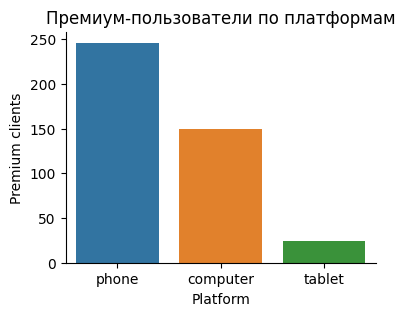

In [97]:
premium_clients_platform = sns.countplot(x='platform', data=user_log.query('premium == True'))
sns.despine()
premium_clients_platform.set(xlabel='Platform', ylabel='Premium clients')
plt.title('Премиум-пользователи по платформам')
plt.show()

Наши премиум пользователи предпочитают телефоны (246).

# Задание 5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [98]:
user_log.head()

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,35604,False,phone,1585459894,True,65.0
3,9961,True,phone,1585400189,NaN,NaN
4,10931,True,computer,1585468629,False,28.0


In [111]:
age_dist_premium = user_log \
    .query('premium == True') \
    .groupby(['age'], as_index=False) \
    .agg({'client': 'count'}) \
    .rename(columns={'client': 'total_clients'})

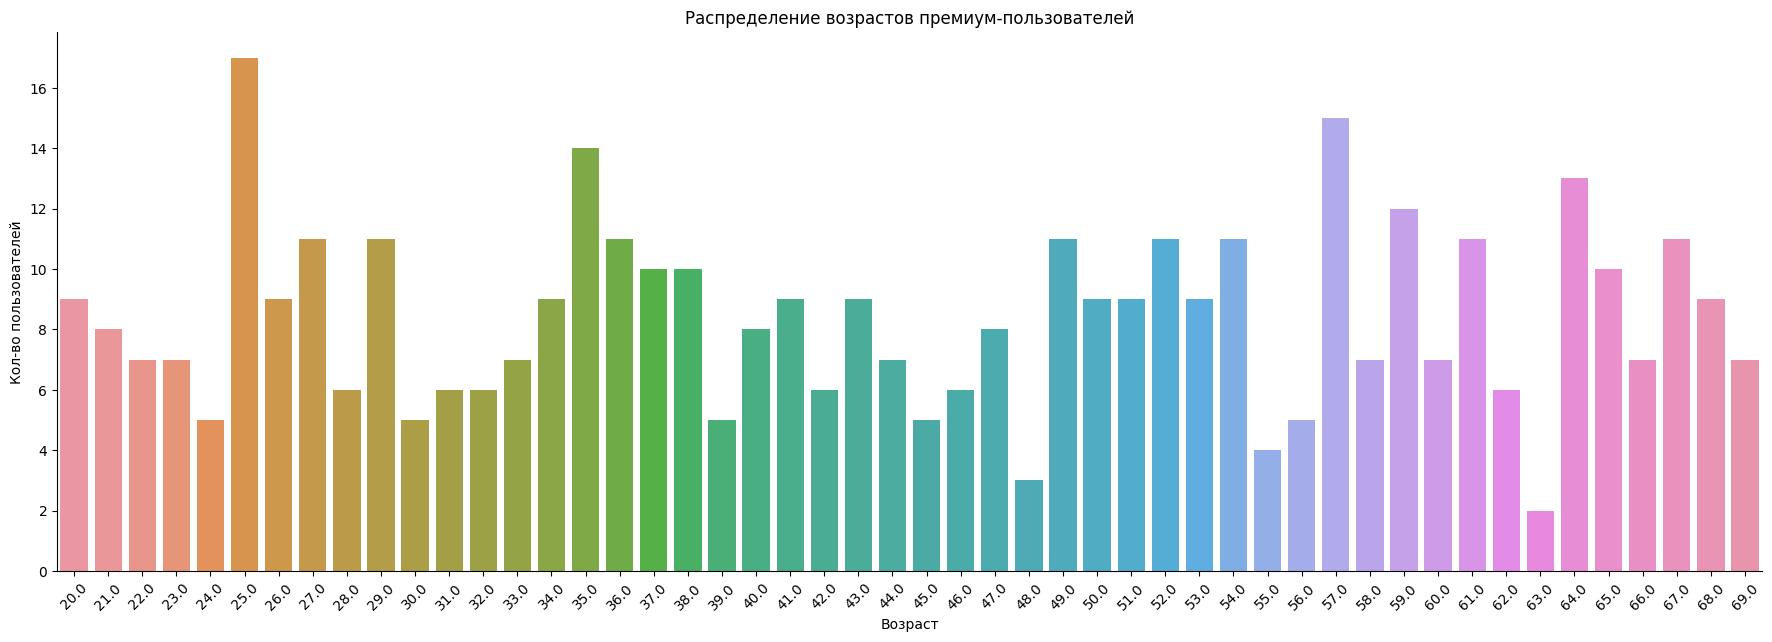

In [165]:
age_dist_premium_chart = sns.countplot(x='age', data=user_log.query('premium == True'))
plt.rcParams['figure.figsize'] = [22, 5]
plt.xticks(rotation=45)
sns.despine()
age_dist_premium_chart.set(xlabel='Возраст', ylabel='Кол-во пользователей')
plt.title('Распределение возрастов премиум-пользователей')

plt.show()

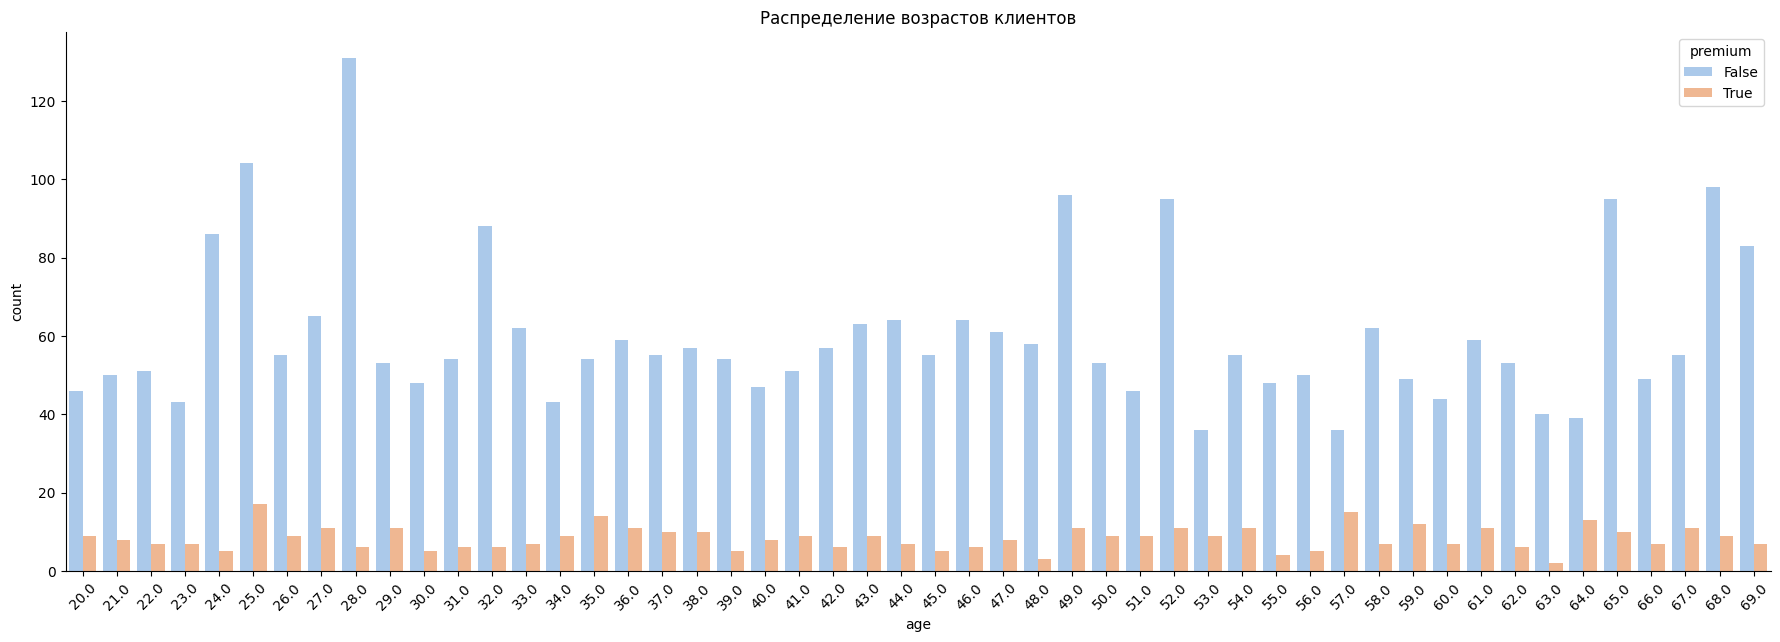

In [233]:


sns.countplot(x='age', hue='premium', palette='pastel', data=user_log)
plt.rcParams['figure.figsize'] = [22, 7]
plt.xticks(rotation=45)
sns.despine()
age_dist_by_premium_or_not.set(xlabel='Возраст', ylabel='Кол-во пользователей')
plt.title('Распределение возрастов клиентов')

plt.show()

C:\Users\Temich\AppData\Local\Temp\ipykernel_9316\3756964634.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_log.query('premium == True').age, label='Premium')
C:\Users\Temich\AppData\Local\Temp\ipykernel_9316\3756964634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_log.query

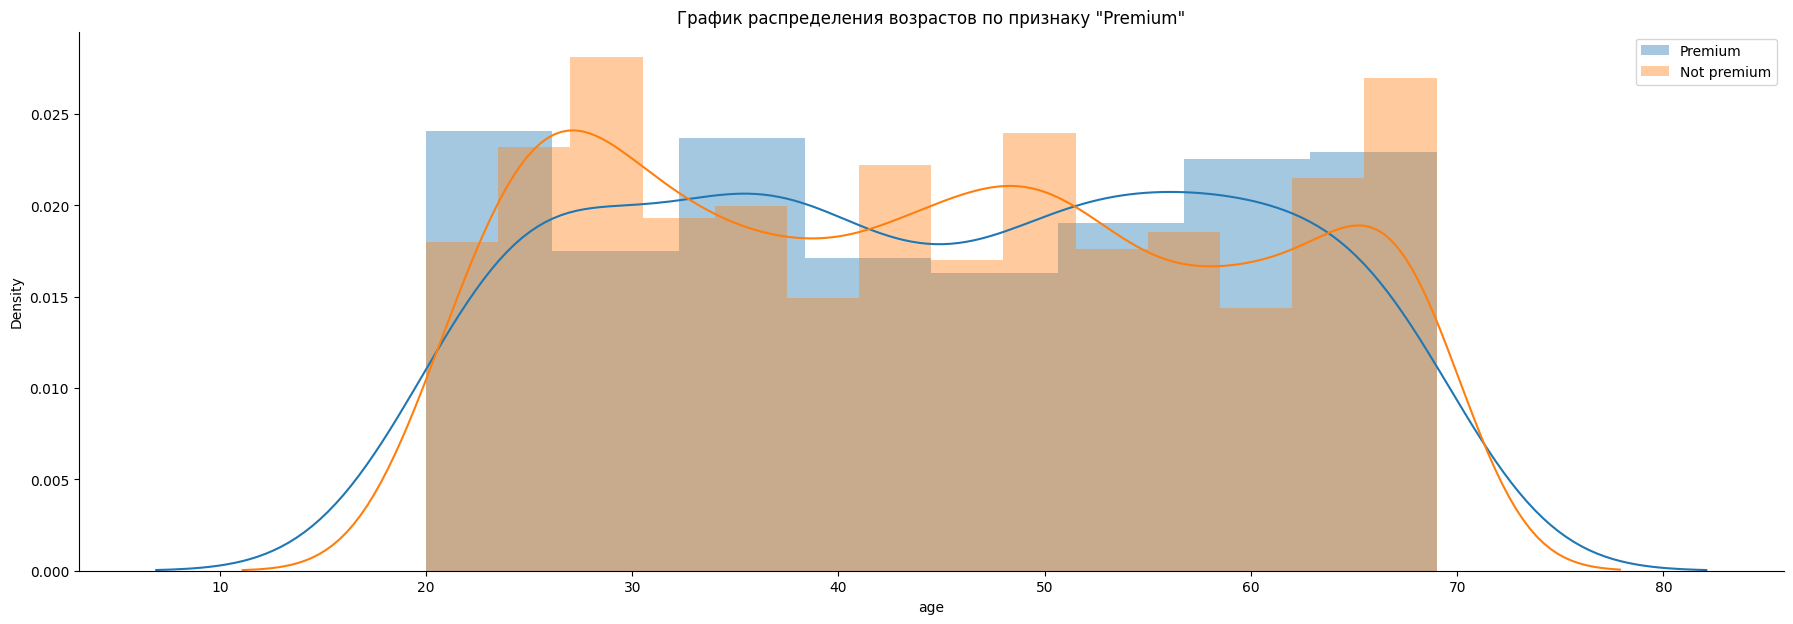

In [187]:
sns.distplot(user_log.query('premium == True').age, label='Premium')
sns.distplot(user_log.query('premium == False').age, label='Not premium')
plt.legend()
sns.despine()
plt.title('График распределения возрастов по признаку "Premium"')
plt.show()

Такое вот распределение возрастов пользователей вышло по параметру премиум/не премиум.

Функцию distplot() скоро удалят из сиборна. :(((

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

# Задание 6. Постройте график распределения числа успешных операций

In [200]:
success_clients = user_log \
    .query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'count'})

success_dist = success_clients \
    .groupby('success', as_index=False) \
    .agg({'client': 'count'})

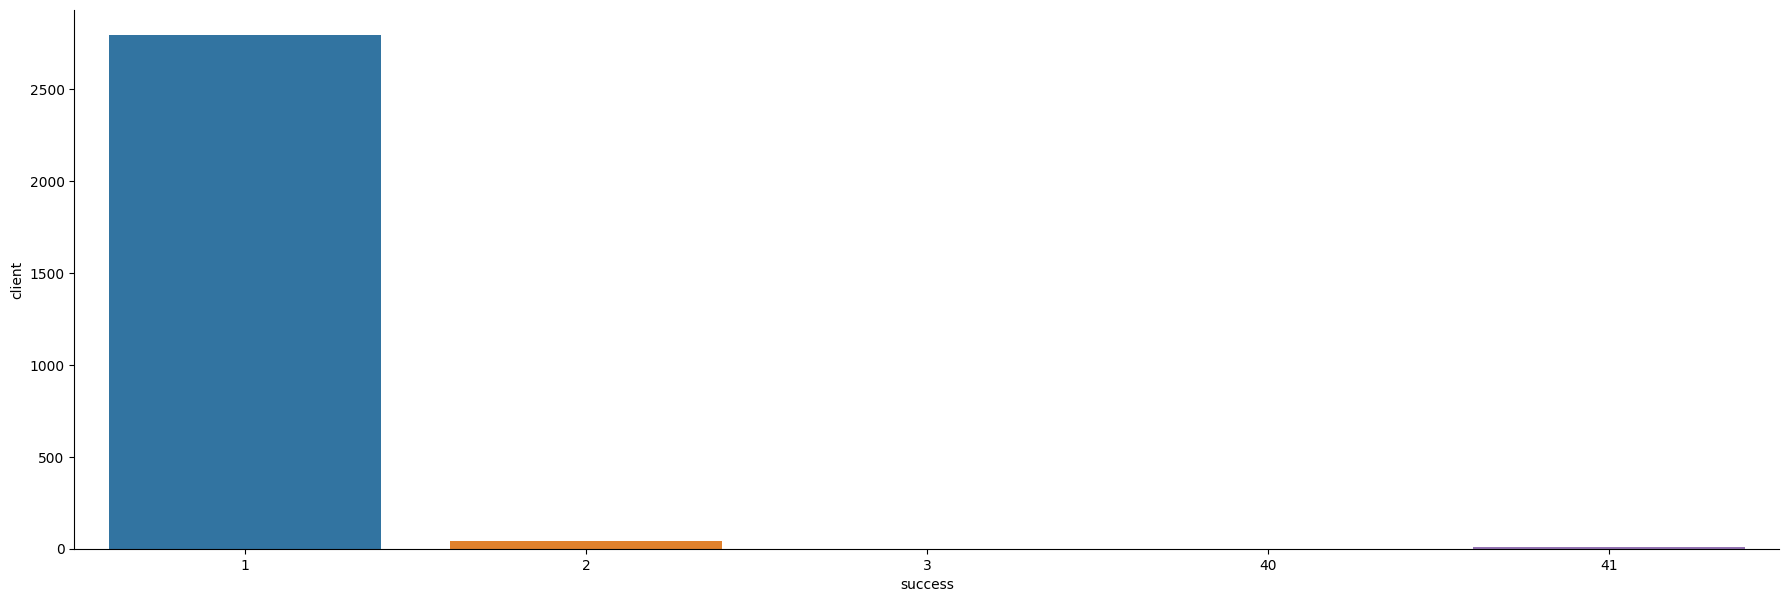

In [207]:
sns.barplot(success_dist, x='success', y='client')
sns.despine()
plt.show()

Не очень наглядный график, но однозначно можно сделать вывод о том, что практически у всех клиентов с уcпешным доступом он такой всего один.


# Задание 7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

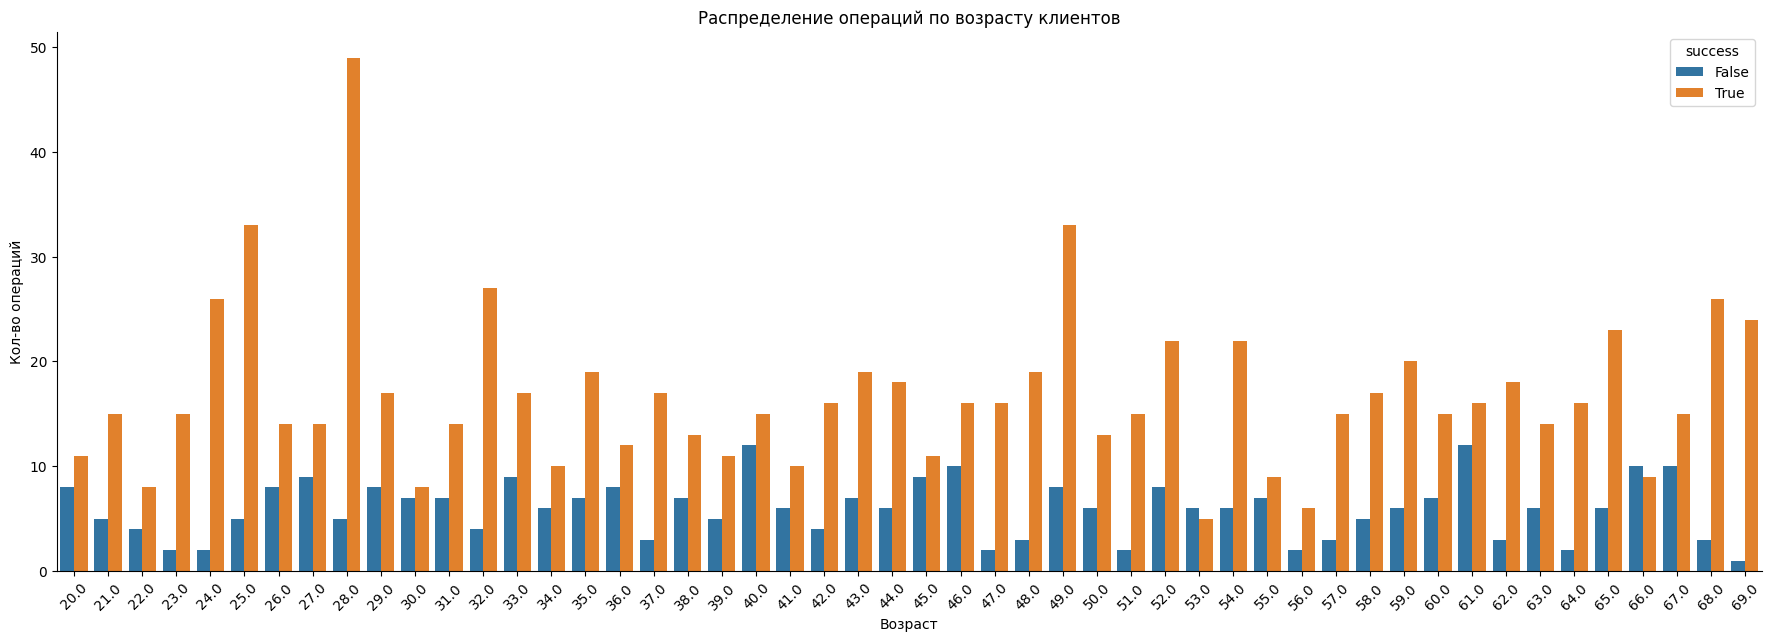

In [216]:
success_age_dist = sns.countplot(x='age', hue='success', data=user_log.query('platform == "computer"'))
success_age_dist.set(xlabel='Возраст', ylabel='Кол-во операций')
sns.despine()
plt.title('Распределение операций по возрасту клиентов')
plt.xticks(rotation=45)
plt.show()

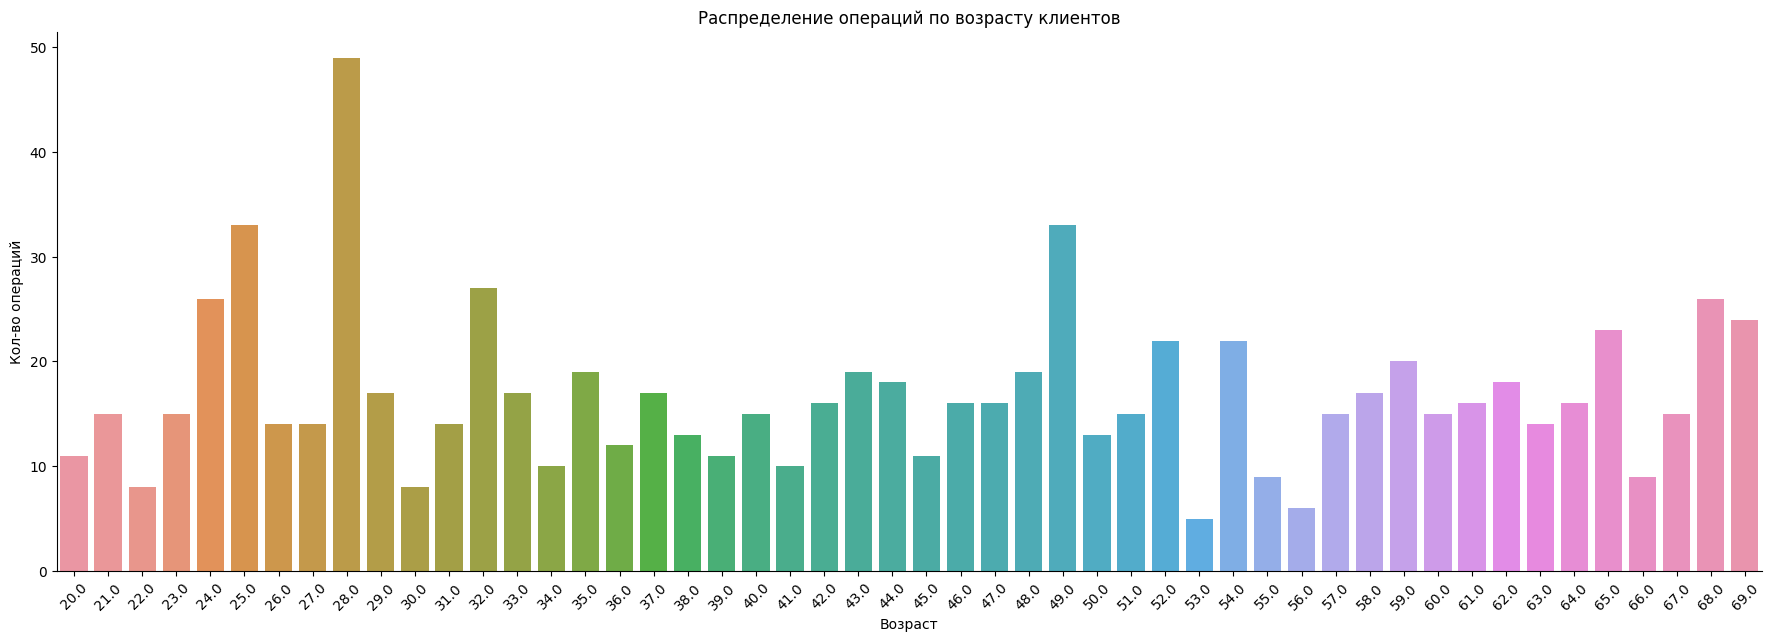

In [229]:
# изначально недопонял задание и сделал еще разбивку на успешные/не успешные операции
# На графике ниже отображены только успешные операции

success_age_dist = sns.countplot(x='age', data=user_log.query('platform == "computer" and  success == True'))
success_age_dist.set(xlabel='Возраст', ylabel='Кол-во операций')
sns.despine()
plt.title('Распределение операций по возрасту клиентов')
plt.xticks(rotation=45)
plt.show()